In [2]:
# !pip install opencv-python
import cv2
import numpy as np
from sklearn.metrics import mean_squared_error
%matplotlib inline

____________________________________________________________________

In [3]:
# !pip install pixellib
# !pip install tensorflow
import pixellib
from pixellib.tune_bg import alter_bg

change_bg = alter_bg(model_type = "pb")
change_bg.load_pascalvoc_model("xception_pascalvoc.pb")

2021-12-03 18:48:14.531339: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/harini/.local/lib/python3.8/site-packages/cv2/../../lib64:
2021-12-03 18:48:14.531395: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-12-03 18:48:27.709187: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-03 18:48:27.761380: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open share

In [47]:
import glob
from IPython.display import Image, display
import csv

file_type = "*.jpg" # Assuming all jpg images of folder (Not a single)
src_path = "images/"
no_of_image_to_show = 89

def display_n_images(src_path, file_type, no_of_image_to_show):
    
    image_folder = glob.glob(src_path + file_type) 
    image_folder = image_folder[0:no_of_image_to_show] 
    i=1
    
    header = ['names']
    with open('names.csv', 'w',encoding='UTF8') as f:
        writer = csv.writer(f)
        writer.writerow(header)
    
        for a_image in image_folder:

            path = list(a_image)
            writer.writerow(a_image)
            final=change_bg.color_bg(a_image , colors=(214,176,161), output_image_name="new_img{n}.jpg".format(n=i), detect = "person")
            i+=1
            # display(Image(filename=a_image))
            # print(a_image)
        
display_n_images(src_path, file_type, no_of_image_to_show)

In [6]:
# img_path='images/2020-05-12_20-07-45_UTC.jpg'
# final=change_bg.color_bg(img_path,colors=(0,255,0), output_image_name="new_pink_img.jpg", detect = "person")
# cv2.imshow(final)

2021-11-30 20:46:47.906833: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 16908544 exceeds 10% of free system memory.
2021-11-30 20:46:47.989833: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 16908544 exceeds 10% of free system memory.
2021-11-30 20:46:48.010253: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 33817088 exceeds 10% of free system memory.
2021-11-30 20:46:48.021555: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 33817088 exceeds 10% of free system memory.
2021-11-30 20:46:48.042121: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 33817088 exceeds 10% of free system memory.


______________

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#img=cv2.imread("/content/new_img.jpg")
for j in range(1,90):

    img2=cv2.imread('new_img{i}.jpg'.format(i=j))
    model2=KMeans(n_clusters=5)
    clt_2 = model2.fit(img2.reshape(-1, 3))
    arr=model2.cluster_centers_
    palettes = palette(arr)
    image_2 = cv2.cvtColor(palette(arr), cv2.COLOR_BGR2RGB)
    plt.imsave('scale{i}.png'.format(i=j),image_2)


def palette(clusters_centers):
    width=300
    palette = np.zeros((50, width, 3), np.uint8)
    steps = width/5
    for idx, centers in enumerate(clusters_centers): 
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
    return palette

# image=cv2.imshow('', img2)
# plt.show(image)

# cv2.imshow('', palette(arr))


In [8]:
#to print the colors
# cv2.imshow('ih', palette(arr))

In [9]:
#steps

#delete green color

# delete skin colors like shades of brown

# delete shades of black as it can be haircolor

# other prominent colors are the colors of the dress

# skin_colors=[]




____________

In [36]:
# !pip install webcolors
import webcolors
def hex2name(c):
    h_color = '#{:02x}{:02x}{:02x}'.format(int(c[0]), int(c[1]), int(c[2]))
    try:
        nm = webcolors.hex_to_name(h_color, spec='css3')
    except ValueError as v_error:
        #print("{}".format(v_error))
        rms_lst = []
        for img_clr, img_hex in webcolors.CSS3_NAMES_TO_HEX.items():
            cur_clr = webcolors.hex_to_rgb(img_hex)
            rmse = np.sqrt(mean_squared_error(c, cur_clr))
            rms_lst.append(rmse)

        closest_color = rms_lst.index(min(rms_lst))

        nm = list(webcolors.CSS3_NAMES_TO_HEX.items())[closest_color][0]
    return nm,h_color

In [43]:
from PIL import Image
from collections import defaultdict
import csv

header = ['color1', 'color2', 'color3', 'color4', 'color5']
with open('colors.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

for j in range(1,90):

    im=Image.open('scale{i}.png'.format(i=j))

    by_color = defaultdict(int)
    l = []
    for pixel in im.getdata():
        by_color[pixel] += 1
    x = []
    y = []
    by_color = list(by_color)

    for i in by_color:
        i = list(i)
        for j in range(0,3):
            y.append(i[j])
        s = y.copy()
        x.append(s)
        y.clear()

    # print(x)
    
    color_list=[]
    for i in x:
        name,hash=hex2name(i)
        # print(hex2name(i))
        color_list.append(name)
    # print(color_list)
    
    with open('colors.csv', 'a') as f:
        
        writer = csv.writer(f)
        writer.writerow(color_list)
    

In [48]:
color_list.remove('lime')
color_list[:-2]

['silver', 'linen']

In [10]:
import cv2
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
# from gensim.models import word2vec
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

In [11]:
df = pd.read_csv("colors.csv")

In [13]:
from csv import reader
with open('colors.csv', 'r') as f:
    csv_reader = reader(f)
    final = []
    index = []
    # given = ['tan','darkslategray','black','lightslategray','indianred']
    # given = ['tan','darkolivegreen','black','rosybrown','dimgray']
    # given = ['tan','saddlebrown','peru','darksalmon','saddlebrown']
    given = ['indianred','tan','darkslategray','darkslategray','lavender']
    count = 0


    for row in csv_reader:
        found = 0
        for j in row:
            if(j!='color1' and j!='color2' and j!='color3' and j!='color4' and j!='color5'):
                for i in given:
                    if(i==j):
                        found+=1
                        break
        if(found>=3):
            index.append(count)
        count+=1

In [14]:
print(index)
final = index[0:5]

[10, 17, 29, 50, 59, 69]


In [15]:
print(final)

[10, 17, 29, 50, 59]


Populating the interactive namespace from numpy and matplotlib
['images/2019-09-12_17-35-58_UTC.jpg']


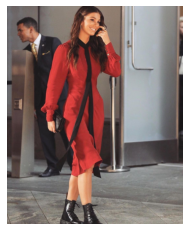

['images/2018-09-23_17-57-15_UTC.jpg']


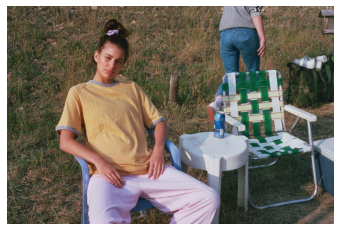

['images/2018-08-23_02-44-48_UTC.jpg']


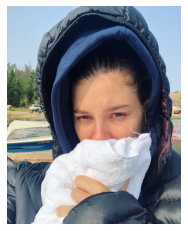

['images/2017-05-20_22-39-51_UTC.jpg']


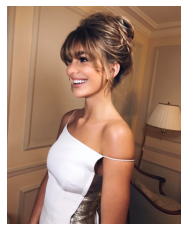

['images/2020-12-20_19-57-04_UTC.jpg']


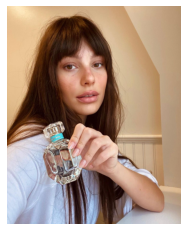

In [60]:
from PIL import Image
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

with open('names.csv', 'r') as f:
    csv_reader = csv.reader(f)
    csv_reader = list(csv_reader)

for i in final:

    # img = mpimg.imread(('new_img{n}.jpg').format(n=i))
    # imgplot = plt.imshow(img)
    # plt.axis("off")
    # plt.show()
            
    path = str(csv_reader[i])
    print(path)

    bg = path[2:-2]

    fin = mpimg.imread(bg)
    imgplot = plt.imshow(fin)
    plt.axis("off")
    plt.show()
    



In [ ]:

    # im = Image.open(('new_img{n}.jpg').format(n=i))
    # im.show()
    # plt.imshow(('new_img{n}.jpg').format(n=i))
    
    
        
    # line_number = 2     
    # text = mycsv[line_number][1]
    # j=i+1
    # path = df.iloc[j, 'names']
    # print(path)
    
    
# df = pd.read_csv("names.csv")
# df.to_csv("new.csv", index=True)

# df = pd.read_csv("names.csv")